# 使用k-means聚类算法

## 生成数据

导入必备的库：

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

生成半随机数据，然后进行聚类：

In [2]:
from sklearn.datasets import make_blobs

points, cluster_index = make_blobs(n_samples = 300, centers = 4, cluster_std = 0.8, random_state = 0)

In [3]:
x = points[:, 0]
y = points[:, 1]

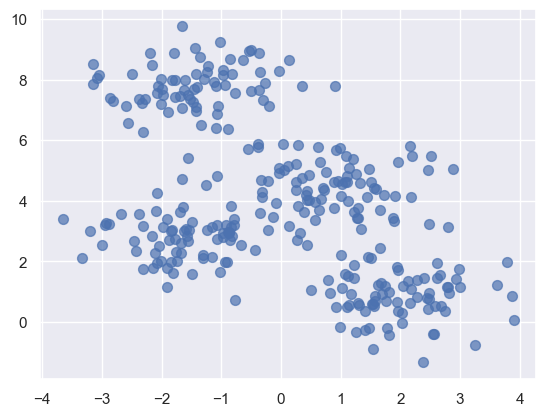

In [4]:
plt.scatter(x, y, s = 50, alpha = 0.7)

接着开始进行聚类：

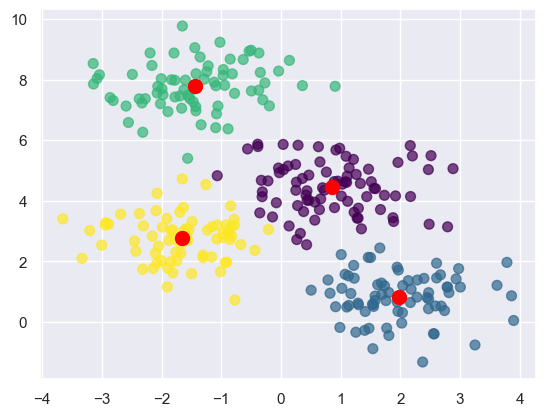

In [8]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(points)
predicted_cluster_indices = kmeans.predict(points)

# 假设 x 和 y 是数据点的坐标
x = points[:, 0]
y = points[:, 1]

plt.scatter(x, y, c=predicted_cluster_indices, s=50, alpha=0.7, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100)

plt.show()

使用可视化比较直观，但是问题在于我们并不能够完全确认需要聚为几个类，而且数据的维度高了之后，我们也无法可视化：

Text(0, 0.5, 'Inertia')

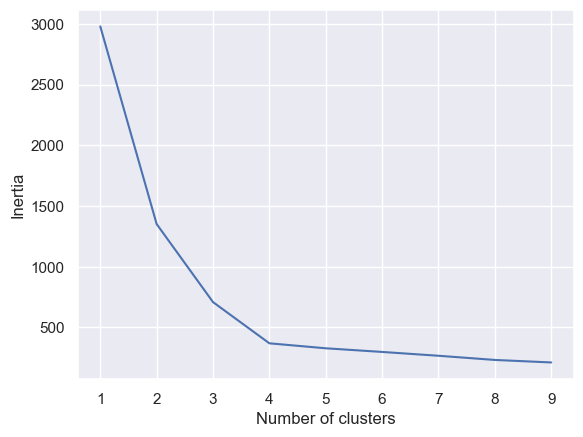

In [10]:
inertias = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(points)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 10), inertias)
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")

可以发现，当聚类的数量达到4的时候，拐点差不多开始出现了。

## 将k-means聚类算法用到真实客户数据

需要下载数据集：https://raw.githubusercontent.com/jeffprosise/Applied-Machine-Learning/main/Chapter%201/Data/customers.csv

In [11]:
# 导入数据集
import pandas as pd

customers = pd.read_csv("./../data/customers.csv")

查看一下数据集：

In [12]:
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


这是一个非常简单的数据集，一共有5个维度，其中CustomerID实际上是一个index，是没有意义的。

Text(0, 0.5, 'Spending Score')

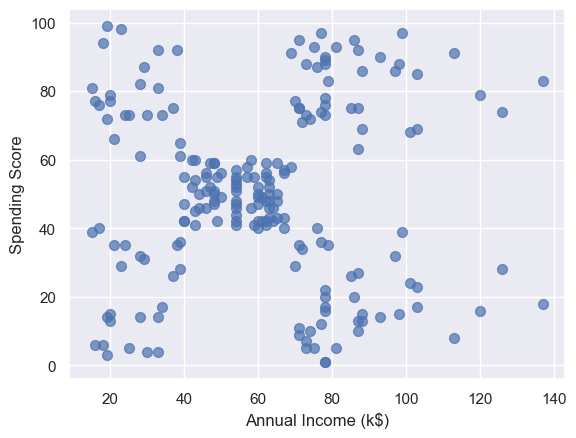

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

points = customers.iloc[:, 3:5].values
x = points[:, 0]
y = points[:, 1]

plt.scatter(x, y, s = 50, alpha = 0.7)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score")

从可视化的结果来看，应该可以分为5个类。

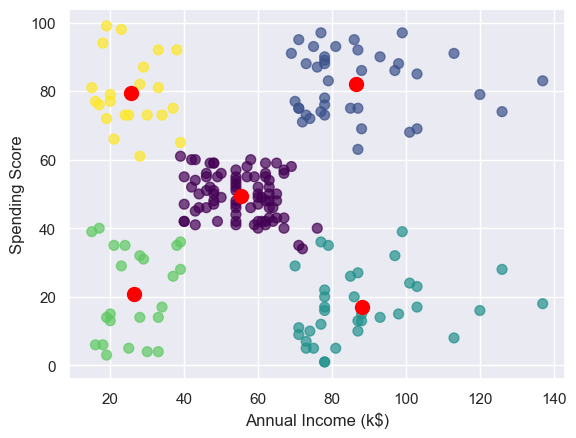

In [14]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 5, random_state = 0)
kmeans.fit(points)
predicted_cluster_indexs = kmeans.predict(points)

plt.scatter(x, y, c = predicted_cluster_indexs, s = 50, alpha=0.7, cmap="viridis")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score")

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = 'red', s = 100)

这里的核心有两个部分：

In [15]:
# 用来拟合数据
# kmeans.fit(points)

# 预测一下聚类
# predicted_cluster_indexs = kmeans.predict(points)
predicted_cluster_indexs

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

predicted_cluster_indices 的值是 KMeans 模型根据数据点的特征将它们分配到不同聚类的结果。每个数据点被分配到一个聚类，聚类的索引从 0 到 4。例如：

- 3 表示数据点被分配到第 3 个聚类。
- 4 表示数据点被分配到第 4 个聚类。
- 0 表示数据点被分配到第 0 个聚类。
- 1 表示数据点被分配到第 1 个聚类。
- 2 表示数据点被分配到第 2 个聚类。

In [18]:
assert len(predicted_cluster_indexs) == customers.shape[0]

我们可以添加新的一列：

In [19]:
df = customers.copy()

df['Cluster'] = kmeans.predict(points)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,3


找到那些收入高但是消费低的客户的ID：

In [23]:
import numpy as np

# get index
cluster = kmeans.predict(np.array([[120, 20]]))[0]

# 
clustered_df = df[df['Cluster'] == cluster]

# show the customer IDs
clustered_df['CustomerID'].values

array([125, 129, 131, 135, 137, 139, 141, 145, 147, 149, 151, 153, 155,
       157, 159, 161, 163, 165, 167, 169, 171, 173, 175, 177, 179, 181,
       183, 185, 187, 189, 191, 193, 195, 197, 199])

这个代码需要解释一下，我们将120和20作为一个阈值，然后符合这个阈值的类别是类别2，那么接下来将类别2的数据都提取出来。

这并不是说所有的类别2的数据都是高收入低消费的，但是总体上来讲是这样的，因为他们被分到了同一个类别中。

上面的代码使用了两个特征，这里使用两个以上的维度：

In [25]:
from sklearn.preprocessing import LabelEncoder

df = customers.copy()
encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


现在需要使用肘部图来查看聚为多少个类是合适的：

Text(0, 0.5, 'Inertia')

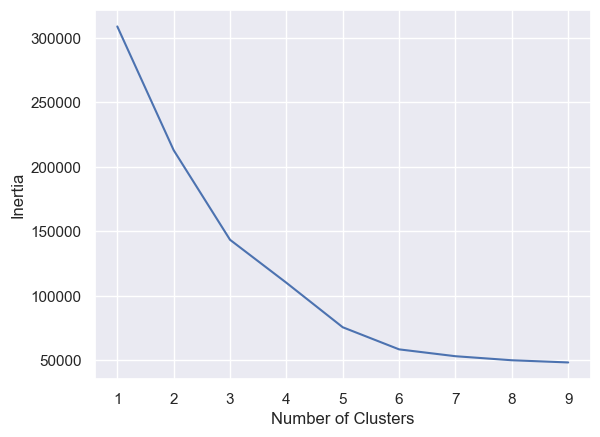

In [29]:
points = df.iloc[:, 1:5].values
inertias = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, random_state = 44)
    kmeans.fit(points)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 10), inertias)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")

基于上图，可以认为6是一个比较合理的数字。

不过需要注意的是，随机种子的影响是存在的，因为迭代的次数是有限的，所以不同的随机数会导致不同的结果。

Text(0, 0.5, 'Inertia')

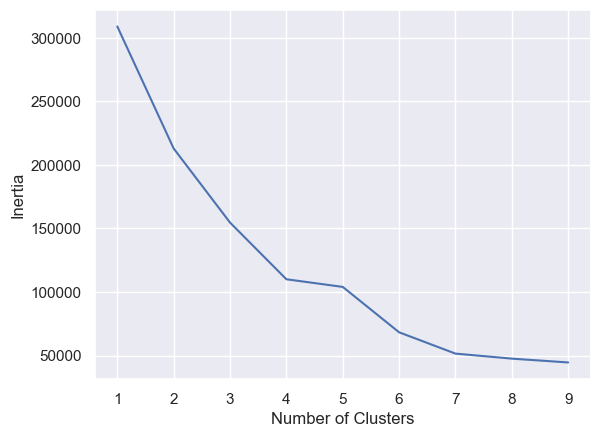

In [31]:
points = df.iloc[:, 1:5].values
inertias = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, random_state = 11)
    kmeans.fit(points)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 10), inertias)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")

4个类似乎更好。

In [41]:
kmeans = KMeans(n_clusters = 4, random_state = 0)
kmeans.fit(points)

df['Cluster'] = kmeans.predict(points)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19,15,39,2
1,2,1,21,15,81,2
2,3,0,20,16,6,0
3,4,0,23,16,77,2
4,5,0,31,17,40,2


无法绘制平面图，但是我们可以计算每个聚类中的这些数值距离聚类中心点的平均值。

In [45]:
results = pd.DataFrame(columns = ['Cluster', 'Average Age', 'Average Income', 'Average Spending Index', 'Number of Females', 'Number of Males'])

for i, center in enumerate(kmeans.cluster_centers_):
    age = center[1]
    income = center[2]
    spend = center[3]

    gdf = df[df['Cluster'] == 1]
    females = gdf[gdf['Gender'] == 0].shape[0]
    males = gdf[gdf['Gender'] == 1].shape[0]

    results.loc[i] = ([i, age, income, spend, females, males])

In [46]:
results.head()

,Cluster,Average Age,Average Income,Average Spending Index,Number of Females,Number of Males
0,0.0,52.057971,46.420290,39.884058,22.0,18.0
1,1.0,32.875000,86.100000,81.525000,22.0,18.0
2,2.0,25.056604,40.735849,62.622642,22.0,18.0
3,3.0,40.394737,87.000000,18.631579,22.0,18.0


可以查看一下：

In [44]:
for i, center in enumerate(kmeans.cluster_centers_):
    print(i, center)

0 [ 0.4057971  52.05797101 46.42028986 39.88405797]
1 [ 0.45  32.875 86.1   81.525]
2 [ 0.41509434 25.05660377 40.73584906 62.62264151]
3 [ 0.52631579 40.39473684 87.         18.63157895]


这里其实是将4个类别，和对应的质心点计算了出来，但是质心的第一个特征是gender，gender实际上是一个分类特征，只是使用了0和1进行表示，所以这里的计算结果没有意义。

**补充知识：**

在 KMeans 聚类中，质心（centroid）的每个特征值确实是该聚类中所有数据点对应特征的平均值。因此，如果一个特征是年龄（Age），那么质心的年龄值就是该聚类中所有数据点年龄的平均值。

KMeans 聚类算法通过以下步骤来找到每个聚类的质心：

- 初始化质心：随机选择 n_clusters 个数据点作为初始质心。
- 分配数据点：将每个数据点分配到最近的质心所在的聚类。
- 更新质心：对于每个聚类，计算所有属于该聚类的数据点的特征平均值，并将这些平均值作为新的质心。
- 迭代：重复步骤 2 和 3，直到质心不再发生变化或达到最大迭代次数。

在步骤 3 中，每个聚类的质心是通过计算该聚类中所有数据点的特征平均值得到的。因此，如果一个特征是年龄，那么质心的年龄值就是该聚类中所有数据点年龄的平均值。

# 监督学习

## K最近邻

这里使用鸢尾花数据：

In [53]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['class'] = iris.target
df['class name'] = iris.target_names[iris['target']]

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class,class name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


我们需要将数据集划分为两个部分：训练集和测试集。

In [54]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size = 0.2, random_state = 0
)

然后使用knn算法：

In [55]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(x_train, y_train)

KNeighborsClassifier()

测试一下：

In [56]:
model.score(x_test, y_test)

0.9666666666666667

可以认为模型的正确率达到了97%。

进行预测：

In [57]:
model.predict([[5.6, 4.4, 1.2, 0.4]])

array([0])

在不指定邻居数量的情况之下，默认邻居数量为5，我们可以人为指定一下：

In [58]:
model = KNeighborsClassifier(n_neighbors=10)

In [60]:
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [61]:
model.score(x_test, y_test)

1.0

In [62]:
model.predict([[5.6, 4.4, 1.2, 0.4]])

array([0])